# Ασκηση 2, Ερώτημα α

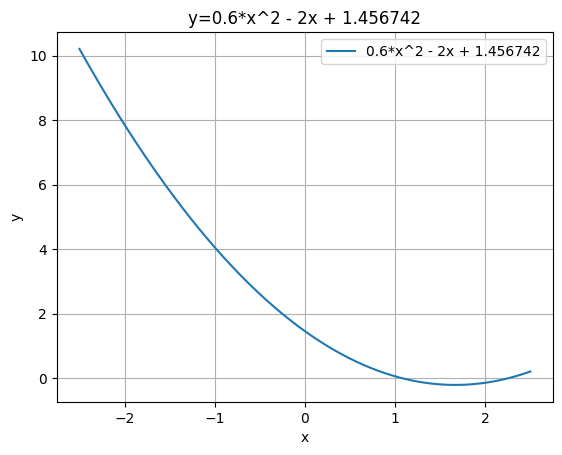

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

x = np.linspace(-2.5, 2.5, 1000)
y = 0.6*x**2 - 2*x + 1.456742

plt.plot(x, y, label='0.6*x^2 - 2x + 1.456742')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.title('y=0.6*x^2 - 2x + 1.456742')
plt.show()


In [10]:
roots = np.roots([0.6, -2, 1.456742])
print("Roots:", roots)

Roots: [2.25816852 1.07516481]


# Ασκηση 2, Ερώτημα β

In [11]:
rng = np.random.default_rng(seed=6)
number_of_samples = 100000 # Choose the number of samples

p_w1, p_w2 = 1/4, 3/4
w1_samples = int(p_w1 * number_of_samples)
w2_samples = int(p_w2 * number_of_samples)
l11, l12, l21, l22 = 0, 1, 3, 0
m1, m2 = 2, 1.8
s1, s2 = np.sqrt(0.5), np.sqrt(0.2)

# Create samples that follow normal distribution
class1 = rng.normal(m1, s1, w1_samples)
class2 = rng.normal(m2, s2, w2_samples)

# Find where the samples are classified
classify_w1_to_w2, classify_w1_to_w1, classify_w2_to_w1, classify_w2_to_w2 = 0, 0, 0, 0
root1 = 1.07516481
root2 = 2.25816852

for sample in class1:
  if root1 < sample < root2:
    classify_w1_to_w2 += 1
  else:
    classify_w1_to_w1 += 1

for sample in class2:
  if root1 < sample < root2:
    classify_w2_to_w2 += 1
  else:
    classify_w2_to_w1 += 1

# Find the probabilities (percentage)
classify_w1_to_w1 = classify_w1_to_w1 / w1_samples
classify_w1_to_w2 = classify_w1_to_w2 / w1_samples
classify_w2_to_w1 = classify_w2_to_w1 / w2_samples
classify_w2_to_w2 = classify_w2_to_w2 / w2_samples

# Calculate the cost
cost = p_w1 * ((l11 * classify_w1_to_w1) + (l21 * classify_w1_to_w2)) + p_w2 * ((l12 * classify_w2_to_w1) + (l22 * classify_w2_to_w2))

In [12]:
# Results
print("w1 classified as w1:", round(classify_w1_to_w1, 3))
print("w1 misclassified as w2:", round(classify_w1_to_w2, 3))
print("w2 misclassified as w1:", round(classify_w2_to_w1, 3))
print("w2 classified as w2", round(classify_w2_to_w2, 3))
print("The cost is:", round(cost, 3))

w1 classified as w1: 0.452
w1 misclassified as w2: 0.548
w2 misclassified as w1: 0.205
w2 classified as w2 0.795
The cost is: 0.564


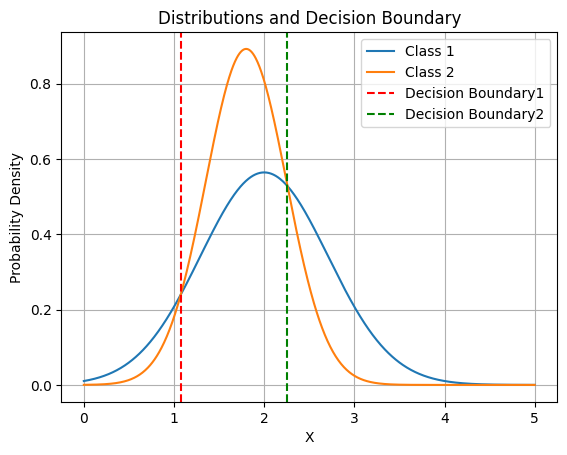

In [13]:
from scipy.stats import norm

x = np.linspace(0, 5, 1000)
pdf1 = norm.pdf(x, m1, s1)
pdf2 = norm.pdf(x, m2, s2)

# Plot the gaussian functions
plt.plot(x, pdf1, label='Class 1')
plt.plot(x, pdf2, label='Class 2')

# Plot the decision boundary
plt.axvline(x=root1, color='red', linestyle='--', label='Decision Boundary1')
plt.axvline(x=root2, color='green', linestyle='--', label='Decision Boundary2')

plt.xlabel('X')
plt.ylabel('Probability Density')
plt.legend()
plt.title('Distributions and Decision Boundary')
plt.grid(True)

# Show the plot
plt.show()

# Ασκηση 3, Ερώτημα α

In [14]:
def calculate_discriminant_function(x, m, s, d, prior):
  if d > 1: # x is a vector
    S_inv = np.linalg.inv(s)
    det_S = round(abs(np.linalg.det(s)), 5)
    return -(1/2)*np.linalg.multi_dot([(x - m).T, S_inv, (x - m)]) - (d/2)*np.log(2*np.pi) - (1/2)*np.log(det_S) + np.log(prior)
  else: # x is a number
    S_inv = 1/s
    det_S = abs(s)
    return -(1/2)*(x - m)*S_inv*(x - m) - (d/2)*np.log(2*np.pi) - (1/2)*np.log(det_S) + np.log(prior)

def euclidian_distance(x1, x2, d):
  if d > 1: # x is a vector
    return np.sqrt(np.sum(np.square(x1 - x2)))
  else: # x is a number
    return abs(x1 - x2)

def mahalanobis_distance(x, m, s, d):
  if d > 1: # x is a vector
    S_inv = np.linalg.inv(s)
    return np.sqrt(np.linalg.multi_dot([(x - m).T, S_inv, (x - m)]))
  else: # x is a number
    S_inv = 1/s
    return np.sqrt((x - m)*S_inv*(x - m))

# Ασκηση 3, Ερώτημα β

Για να δουλέψει η εντολή που διαβάζει το αρχείο csv πρέπει να κάνουμε το αρχείο upload στο ίδιο φάκελο στο colab.

In [15]:
!ls

data.csv  sample_data


In [16]:
df = pd.read_csv("data.csv")

In [17]:
df

,x1,x2,x3,ω_i
0,1.60,-0.99,5.83,1
1,6.51,1.19,2.35,1
2,-9.01,-5.30,-2.21,1
3,2.83,1.01,7.12,1
4,0.77,-3.91,-4.31,1
...,...,...,...,...
115,1.16,-1.76,-5.77,3
116,0.07,-3.78,-3.75,3
117,6.55,3.24,8.75,3
118,3.88,2.27,2.08,3


In [18]:
class1 = df[df["ω_i"] == 1].drop("ω_i", axis=1)
class2 = df[df["ω_i"] == 2].drop("ω_i", axis=1)
class3 = df[df["ω_i"] == 3].drop("ω_i", axis=1)

In [19]:
mean_class1 = np.mean(class1, axis=0) # axis = 0, means each column is a feature
mean_class2 = np.mean(class2, axis=0)
mean_class3 = np.mean(class3, axis=0)

result_mean = pd.concat([mean_class1, mean_class2, mean_class3], axis=1)
result_mean

,0,1,2
x1,0.906410,-1.48425,3.680244
x2,-1.044872,-1.14825,1.244390
x3,-0.361795,-1.00925,1.056098


In [20]:
covariance_class1 = np.cov(class1, rowvar=False) # rowvar = False, means each column is a feature
covariance_class1

array([[26.65228151, 15.823661  ,  4.65561444],
       [15.823661  , 18.38869933, -0.83357476],
       [ 4.65561444, -0.83357476, 20.78017827]])

In [21]:
covariance_class2 = np.cov(class2, rowvar=False)
covariance_class2

array([[ 38.95285071,   7.96999481, -18.84354801],
       [  7.96999481,  11.40803532,   0.42592429],
       [-18.84354801,   0.42592429,  19.70946865]])

In [22]:
covariance_class3 = np.cov(class3, rowvar=False)
covariance_class3

array([[ 9.45306744,  6.3758239 ,  9.46632848],
       [ 6.3758239 ,  6.85514024,  5.76523256],
       [ 9.46632848,  5.76523256, 40.60765439]])

In [23]:
mean_class1_x1 = np.mean(class1['x1'])
covariance_class1_x1 = np.cov(class1['x1'])

mean_class2_x1 = np.mean(class2['x1'])
covariance_class2_x1 = np.cov(class2['x1'])

mean_class3_x1 = np.mean(class3['x1'])
covariance_class3_x1 = np.cov(class3['x1'])

print(f"Mean for x1, Class 1: {mean_class1_x1}")
print(f"Mean for x1, Class 2: {mean_class2_x1}")
print(f"Mean for x1, Class 3: {mean_class3_x1}\n")

print(f"Covariance for x1, Class 1: {covariance_class1_x1}")
print(f"Covariance for x1, Class 2: {covariance_class2_x1}")
print(f"Covariance for x1, Class 3: {covariance_class3_x1}")

Mean for x1, Class 1: 0.9064102564102564
Mean for x1, Class 2: -1.4842499999999998
Mean for x1, Class 3: 3.6802439024390248

Covariance for x1, Class 1: 26.65228151147099
Covariance for x1, Class 2: 38.952850705128206
Covariance for x1, Class 3: 9.45306743902439


In [24]:
mean_class1_x1_x2 = np.mean(class1[['x1', 'x2']], axis=0)
covariance_class1_x1_x2 = np.cov(class1[['x1', 'x2']], rowvar=False)

mean_class2_x1_x2 = np.mean(class2[['x1', 'x2']], axis=0)
covariance_class2_x1_x2 = np.cov(class2[['x1', 'x2']], rowvar=False)

mean_class3_x1_x2 = np.mean(class3[['x1', 'x2']], axis=0)
covariance_class3_x1_x2 = np.cov(class3[['x1', 'x2']], rowvar=False)

print(f"Mean for x1_x2, Class 1: {list(mean_class1_x1_x2)}")
print(f"Mean for x1_x2, Class 2: {list(mean_class2_x1_x2)}")
print(f"Mean for x1_x2, Class 3: {list(mean_class3_x1_x2)}\n")

print(f"Covariance for x1_x2, Class 1:\n {covariance_class1_x1_x2}")
print(f"Covariance for x1_x2, Class 2:\n {covariance_class2_x1_x2}")
print(f"Covariance for x1_x2, Class 3:\n {covariance_class3_x1_x2}")

Mean for x1_x2, Class 1: [0.9064102564102564, -1.0448717948717952]
Mean for x1_x2, Class 2: [-1.4842499999999998, -1.1482499999999998]
Mean for x1_x2, Class 3: [3.6802439024390248, 1.244390243902439]

Covariance for x1_x2, Class 1:
 [[26.65228151 15.823661  ]
 [15.823661   18.38869933]]
Covariance for x1_x2, Class 2:
 [[38.95285071  7.96999481]
 [ 7.96999481 11.40803532]]
Covariance for x1_x2, Class 3:
 [[9.45306744 6.3758239 ]
 [6.3758239  6.85514024]]


In [25]:
mean_class1_x1_x2_x3 = np.mean(class1[['x1', 'x2', 'x3']], axis=0)
covariance_class1_x1_x2_x3 = np.cov(class1[['x1', 'x2', 'x3']], rowvar=False)

mean_class2_x1_x2_x3 = np.mean(class2[['x1', 'x2', 'x3']], axis=0)
covariance_class2_x1_x2_x3 = np.cov(class2[['x1', 'x2', 'x3']], rowvar=False)

mean_class3_x1_x2_x3 = np.mean(class3[['x1', 'x2', 'x3']], axis=0)
covariance_class3_x1_x2_x3 = np.cov(class3[['x1', 'x2', 'x3']], rowvar=False)

print(f"Mean for x1_x2_x3, Class 1: {list(mean_class1_x1_x2_x3)}")
print(f"Mean for x1_x2_x3, Class 2: {list(mean_class2_x1_x2_x3)}")
print(f"Mean for x1_x2_x3, Class 3: {list(mean_class3_x1_x2_x3)}\n")

print(f"Covariance for x1_x2_x3, Class 1:\n {covariance_class1_x1_x2_x3}")
print(f"Covariance for x1_x2_x3, Class 2:\n {covariance_class2_x1_x2_x3}")
print(f"Covariance for x1_x2_x3, Class 3:\n {covariance_class3_x1_x2_x3}")

Mean for x1_x2_x3, Class 1: [0.9064102564102564, -1.0448717948717952, -0.36179487179487185]
Mean for x1_x2_x3, Class 2: [-1.4842499999999998, -1.1482499999999998, -1.0092500000000002]
Mean for x1_x2_x3, Class 3: [3.6802439024390248, 1.244390243902439, 1.0560975609756098]

Covariance for x1_x2_x3, Class 1:
 [[26.65228151 15.823661    4.65561444]
 [15.823661   18.38869933 -0.83357476]
 [ 4.65561444 -0.83357476 20.78017827]]
Covariance for x1_x2_x3, Class 2:
 [[ 38.95285071   7.96999481 -18.84354801]
 [  7.96999481  11.40803532   0.42592429]
 [-18.84354801   0.42592429  19.70946865]]
Covariance for x1_x2_x3, Class 3:
 [[ 9.45306744  6.3758239   9.46632848]
 [ 6.3758239   6.85514024  5.76523256]
 [ 9.46632848  5.76523256 40.60765439]]


# Ασκηση 3, Ερώτημα γ

In [26]:
# Classification error using feature x1
d = 1
prior = 1/2

g1_class1 = calculate_discriminant_function(class1['x1'], mean_class1_x1, covariance_class1_x1, d, prior)
g2_class1 = calculate_discriminant_function(class1['x1'], mean_class2_x1, covariance_class2_x1, d, prior)
g1_class2 = calculate_discriminant_function(class2['x1'], mean_class1_x1, covariance_class1_x1, d, prior)
g2_class2 = calculate_discriminant_function(class2['x1'], mean_class2_x1, covariance_class2_x1, d, prior)

wrong_to_class1 = (g1_class1 < g2_class1).sum()
wrong_to_class2 = (g1_class2 > g2_class2).sum()
wrong = wrong_to_class1 + wrong_to_class2

total_points = len(class1['x1']) + len(class2['x1'])
error = (wrong / total_points) * 100

print(f"The points misclassified using feature x1 are {wrong} out of {total_points}, error is: {round(error, 4)}%")

The points misclassified using feature x1 are 32 out of 79, error is: 40.5063%


# Ασκηση 3, Ερώτημα δ

In [27]:
class1_array = class1[['x1', 'x2']].to_numpy()
mean_class1_x1_x2 = mean_class1_x1_x2.to_numpy()
class2_array = class2[['x1', 'x2']].to_numpy()
mean_class2_x1_x2 = mean_class2_x1_x2.to_numpy()

In [28]:
# Classification error using feature x1, x2
d = 2
prior = 1/2
wrong_to_class1 = 0
wrong_to_class2 = 0

for i in range(len(class1['x1'])):
  g1_class1 = calculate_discriminant_function(class1_array[i, :], mean_class1_x1_x2, covariance_class1_x1_x2, d, prior)
  g2_class1 = calculate_discriminant_function(class1_array[i, :], mean_class2_x1_x2, covariance_class2_x1_x2, d, prior)
  if g1_class1 < g2_class1:
    wrong_to_class2 += 1

for i in range(len(class2['x1'])):
  g1_class2 = calculate_discriminant_function(class2_array[i, :], mean_class1_x1_x2, covariance_class1_x1_x2, d, prior)
  g2_class2 = calculate_discriminant_function(class2_array[i, :], mean_class2_x1_x2, covariance_class2_x1_x2, d, prior)
  if g1_class2 > g2_class2:
    wrong_to_class1 += 1

wrong = wrong_to_class1 + wrong_to_class2
total_points = len(class1['x1']) + len(class2['x1'])
error = (wrong / total_points) * 100

print(f"The points misclassified using features x1, x2 are {wrong} out of {total_points}, error is: {round(error, 4)}%")

The points misclassified using features x1, x2 are 30 out of 79, error is: 37.9747%


In [29]:
class1_array = class1[['x1', 'x2', 'x3']].to_numpy()
mean_class1_x1_x2_x3 = mean_class1_x1_x2_x3.to_numpy()
class2_array = class2[['x1', 'x2', 'x3']].to_numpy()
mean_class2_x1_x2_x3 = mean_class2_x1_x2_x3.to_numpy()

In [30]:
# Classification error using feature x1, x2, x3
d = 3
prior = 1/2
wrong_to_class1 = 0
wrong_to_class2 = 0

for i in range(len(class1['x1'])):
  g1_class1 = calculate_discriminant_function(class1_array[i, :], mean_class1_x1_x2_x3, covariance_class1_x1_x2_x3, d, prior)
  g2_class1 = calculate_discriminant_function(class1_array[i, :], mean_class2_x1_x2_x3, covariance_class2_x1_x2_x3, d, prior)
  if g1_class1 < g2_class1:
    wrong_to_class2 += 1

for i in range(len(class2['x1'])):
  g1_class2 = calculate_discriminant_function(class2_array[i, :], mean_class1_x1_x2_x3, covariance_class1_x1_x2_x3, d, prior)
  g2_class2 = calculate_discriminant_function(class2_array[i, :], mean_class2_x1_x2_x3, covariance_class2_x1_x2_x3, d, prior)
  if g1_class2 > g2_class2:
    wrong_to_class1 += 1

wrong = wrong_to_class1 + wrong_to_class2
total_points = len(class1['x1']) + len(class2['x1'])
error = (wrong / total_points) * 100

print(f"The points misclassified using features x1, x2, x3 are {wrong} out of {total_points}, error is: {round(error, 4)}%")

The points misclassified using features x1, x2, x3 are 17 out of 79, error is: 21.519%


# Ασκηση 3, Ερώτημα ε

In [31]:
class1_array = class1[['x1', 'x2', 'x3']].to_numpy()
# mean_class1_x1_x2_x3 = mean_class1_x1_x2_x3.to_numpy()
class2_array = class2[['x1', 'x2', 'x3']].to_numpy()
# mean_class2_x1_x2_x3 = mean_class2_x1_x2_x3.to_numpy()
class3_array = class3[['x1', 'x2', 'x3']].to_numpy()
# mean_class3_x1_x2_x3 = mean_class2_x1_x2_x3.to_numpy()

In [32]:
# Classification error using feature x1, x2, x3
d = 3
prior1 = 0.8
prior2 = 0.1
prior3 = 0.1
wrong = 0

for i in range(len(class1['x1'])):
  g1_class1 = calculate_discriminant_function(class1_array[i, :], mean_class1_x1_x2_x3, covariance_class1_x1_x2_x3, d, prior1)
  g2_class1 = calculate_discriminant_function(class1_array[i, :], mean_class2_x1_x2_x3, covariance_class2_x1_x2_x3, d, prior2)
  g3_class1 = calculate_discriminant_function(class1_array[i, :], mean_class3_x1_x2_x3, covariance_class3_x1_x2_x3, d, prior3)
  if g1_class1 < g2_class1 or g1_class1 < g3_class1:
    wrong += 1

for i in range(len(class2['x1'])):
  g1_class2 = calculate_discriminant_function(class2_array[i, :], mean_class1_x1_x2_x3, covariance_class1_x1_x2_x3, d, prior1)
  g2_class2 = calculate_discriminant_function(class2_array[i, :], mean_class2_x1_x2_x3, covariance_class2_x1_x2_x3, d, prior2)
  g3_class2 = calculate_discriminant_function(class2_array[i, :], mean_class3_x1_x2_x3, covariance_class3_x1_x2_x3, d, prior3)
  if g1_class2 > g2_class2 or g3_class2 > g2_class2:
    wrong += 1

for i in range(len(class3['x1'])):
  g1_class3 = calculate_discriminant_function(class3_array[i, :], mean_class1_x1_x2_x3, covariance_class1_x1_x2_x3, d, prior1)
  g2_class3 = calculate_discriminant_function(class3_array[i, :], mean_class2_x1_x2_x3, covariance_class2_x1_x2_x3, d, prior2)
  g3_class3 = calculate_discriminant_function(class3_array[i, :], mean_class3_x1_x2_x3, covariance_class3_x1_x2_x3, d, prior3)
  if g1_class3 > g3_class3 or g2_class3 > g3_class3:
    wrong += 1

total_points = len(class1['x1']) + len(class2['x1']) + len(class3['x1'])
error = (wrong / total_points) * 100

print(f"The points misclassified using features x1, x2, x3 are {wrong} out of {total_points}, error is: {round(error, 4)}%")

The points misclassified using features x1, x2, x3 are 66 out of 120, error is: 55.0%


# Ασκηση 4, Ερώτημα α

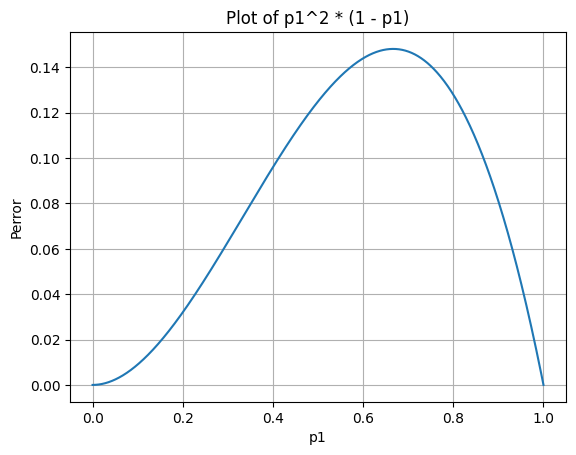

In [33]:
points = 1000
x = np.linspace(0, 1, points, endpoint=True)
y = x**2 * (1 - x)

plt.plot(x, y)

plt.xlabel('p1')
plt.ylabel('Perror')
plt.title('Plot of p1^2 * (1 - p1)')
plt.grid(True)

# Show the plot
plt.show()

In [34]:
max_value = max(y)
max_index = np.argmax(y) / points # 0-1 there are 1000 points

print(f"Max error is {round(max_value, 3)} for p1 {round(max_index, 3)}")

Max error is 0.148 for p1 0.666


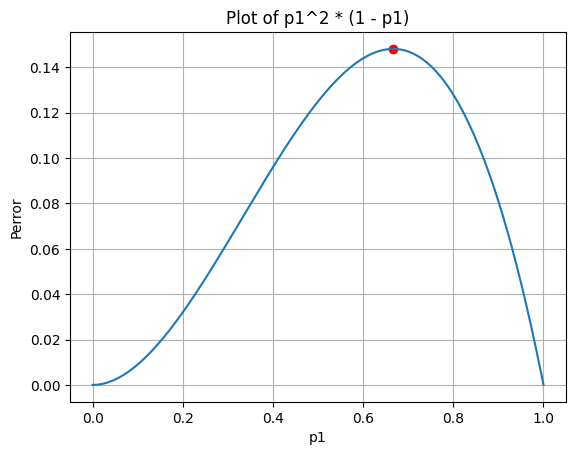

In [35]:
# plot max as apoint
points = 1000
x = np.linspace(0, 1, points, endpoint=True)
y = x**2 * (1 - x)

plt.plot(x, y)
plt.scatter(max_index, max_value, color='red')

plt.xlabel('p1')
plt.ylabel('Perror')
plt.title('Plot of p1^2 * (1 - p1)')
plt.grid(True)

# Show the plot
plt.show()

# Ασκηση 4, Ερώτημα β

In [36]:
import sympy

x = sympy.symbols('x')
y = x**2 * (1 - x)
derivative = sympy.diff(y, x)
derivative

-x**2 + 2*x*(1 - x)

In [37]:
x1 = 0.3
y1 = x1**2 * (1 - x1)

print(f"The value of y at x = {x1} is {y1}")

The value of y at x = 0.3 is 0.063


In [38]:
p1 = 0.3
derivative_p1 = derivative.subs(x, p1)

print(f"The derivative at x = {p1} is {derivative_p1}")

The derivative at x = 0.3 is 0.330000000000000


In [39]:
line_cost = derivative_p1 * (x - x1) + y1
line_cost

0.33*x - 0.036

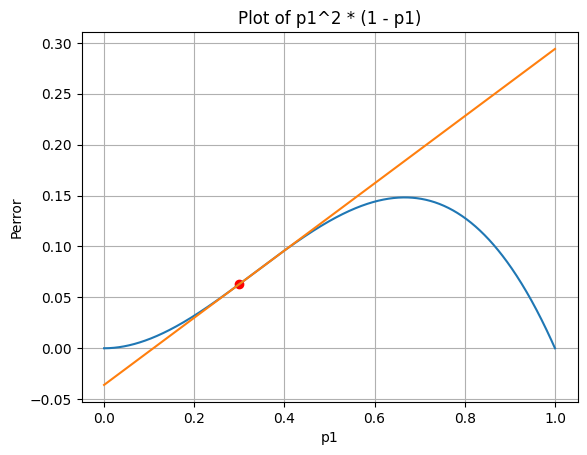

In [40]:
points = 1000
x = np.linspace(0, 1, points, endpoint=True)
y = x**2 * (1 - x)

line = 0.33 * x - 0.036

plt.plot(x, y)
plt.plot(x, line, label='0.33x - 0.036')
plt.scatter(x1, y1, color='red')

plt.xlabel('p1')
plt.ylabel('Perror')
plt.title('Plot of p1^2 * (1 - p1)')
plt.grid(True)

# Show the plot
plt.show()

In [41]:
# find error when real p1 is 0.7
x_real = 0.7
cost = 0.33 * x_real - 0.036
print(f"Cost for p1 = {x_real} is {round(cost, 3)} when we have regulate the system considered p1=0.3")

Cost for p1 = 0.7 is 0.195 when we have regulate the system considered p1=0.3


# Ασκηση 5, Ερώτημα α

In [42]:
import math
from scipy.integrate import quad

def beta(theta):
  return theta*(1-theta)**4

A = 1/quad(beta, 0, 1)[0]
print("A = ", A)

A =  30.0


# Ασκηση 5, Ερώτημα β

Integral of P(theta|D^1) = 1.0
Integral of P(theta|D^5) = 1.0
Integral of P(theta|D^10) = 1.0


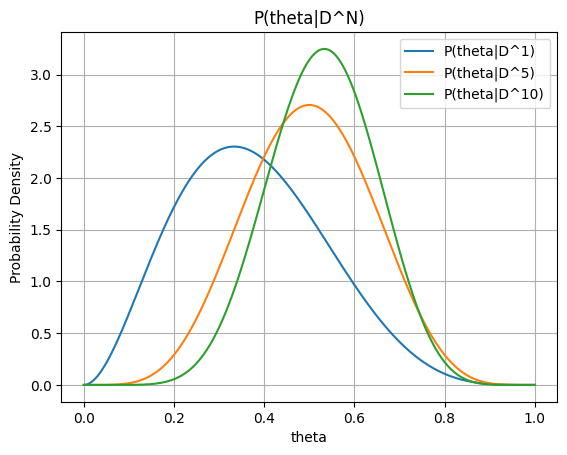

In [43]:
coin = np.array([1, 0, 1, 1, 1, 0, 1, 1, 0, 1]) # heads=1, tails=0
points = 1000
theta = np.linspace(0, 1, points)
y = []

def num(theta, k, N):
  return (theta**k)*(1-theta)**(N-k)*A*beta(theta)


for N in [1, 5, 10]:
  k = (coin[0:N] == 1).sum() # count heads
  den = quad(num, 0, 1, args=(k, N))[0]
  y.append(num(theta, k, N)/den)

  # Check that integral of each pdf is 1
  integral_y = np.trapz(num(theta, k, N)/den, theta)
  print(f'Integral of P(theta|D^{N}) = {round(integral_y, 3)}')

fig = plt.figure()
plt.plot(theta, y[0])
plt.plot(theta, y[1])
plt.plot(theta, y[2])
plt.legend(["P(theta|D^1)", "P(theta|D^5)", "P(theta|D^10)"])
plt.xlabel('theta')
plt.ylabel('Probability Density')
plt.title('P(theta|D^N)')
plt.grid(True)
plt.show()

# Ασκηση 5, Ερώτημα γ

In [44]:
max_value = max(y[2])
max_index = np.argmax(y[2]) / points # 0-1 there are 1000 points

print(f"Probability Density is {round(max_value, 3)} for theta (P(x=k|D^10)) = {round(max_index, 3)}")
print(f"Τheta (P(x=γ|D^10)) = {round(1-max_index, 3)}") # p(γ)=1-p(κ)

Probability Density is 3.249 for theta (P(x=k|D^10)) = 0.533
Τheta (P(x=γ|D^10)) = 0.467
